<h1 style='text-align: center;'>CHICAGO CRIME DATA ANALYIS</h1>
<br>
<h2 style='text-align: center;'>JAY CEE I. MACARAIG</h2>
<h3 style='text-align: center;'>BSIT - 3B</h3>
<hr>

<h2>IMPORTING IMPORTANT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import folium
from folium.plugins import HeatMap

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\Chicago_Crimes.csv')

In [3]:
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<hr><br>
<h2>CLEANING DATA TYPES AND FILLING UP NULL VALUES</h2>

In [4]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [6]:
data['Location Description'] = data['Location Description'].fillna('unaccounted')

data['Community Area'] = data['Community Area'].fillna(data['Community Area'].mode()[0])

data['X Coordinate'] = data['X Coordinate'].fillna(data['X Coordinate'].median())
data['Y Coordinate'] = data['Y Coordinate'].fillna(data['Y Coordinate'].median())
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mode()[0])
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mode()[0])
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['HourOfDay'] = data['Date'].dt.hour

data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
HourOfDay               0
dtype: int64

In [7]:
data['ID'] = data['ID'].astype('category')
data['Case Number'] = data['Case Number'].astype('category')
data['Block'] = data['Block'].astype('category')
data['Primary Type'] = data['Primary Type'].astype('category')
data['Description'] = data['Description'].astype('category')
data['Location Description'] = data['Location Description'].astype('category')
data['FBI Code'] = data['FBI Code'].astype('category')

data['Updated On'] = pd.to_datetime(data['Updated On'], dayfirst=True, errors='coerce')

data['Location'] = data['Location'].astype('category')

data['Season'] = data['Month'].map({12:"Winter",1:"Winter",2:"Winter",
                          3:"Spring",4:"Spring",5:"Spring",
                          6:"Summer",7:"Summer",8:"Summer",
                          9:"Fall",10:"Fall",11:"Fall"})

data.dtypes 

ID                            category
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                            object
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
HourOfDay                

<hr><br>
<h2>SOME ADDITIONAL INFORMATIONS</h2>

In [8]:

Community_Names = {
    1: "Rogers Park",
    2: "West Ridge",
    3: "Uptown",
    4: "Lincoln Square",
    5: "North Center",
    6: "Lake View",
    7: "Lincoln Park",
    8: "Near North Side",
    9: "Edison Park",
    10: "Norwood Park",
    11: "Jefferson Park",
    12: "Forest Glen",
    13: "North Park",
    14: "Albany Park",
    15: "Portage Park",
    16: "Irving Park",
    17: "Dunning",
    18: "Montclare",
    19: "Belmont Cragin",
    20: "Hermosa",
    21: "Avondale",
    22: "Logan Square",
    23: "Humboldt Park",
    24: "West Town",
    25: "Austin",
    26: "West Garfield Park",
    27: "East Garfield Park",
    28: "Near West Side",
    29: "North Lawndale",
    30: "South Lawndale",
    31: "Lower West Side",
    32: "Loop",
    33: "Near South Side",
    34: "Armour Square",
    35: "Douglas",
    36: "Oakland",
    37: "Fuller Park",
    38: "Grand Boulevard",
    39: "Kenwood",
    40: "Washington Park",
    41: "Hyde Park",
    42: "Woodlawn",
    43: "South Shore",
    44: "Chatham",
    45: "Avalon Park",
    46: "South Chicago",
    47: "Burnside",
    48: "Calumet Heights",
    49: "Roseland",
    50: "Pullman",
    51: "South Deering",
    52: "East Side",
    53: "West Pullman",
    54: "Riverdale",
    55: "Hegewisch",
    56: "Garfield Ridge",
    57: "Archer Heights",
    58: "Brighton Park",
    59: "McKinley Park",
    60: "Bridgeport",
    61: "New City",
    62: "West Elsdon",
    63: "Gage Park",
    64: "Clearing",
    65: "West Lawn",
    66: "Chicago Lawn",
    67: "West Englewood",
    68: "Englewood",
    69: "Greater Grand Crossing",
    70: "Ashburn",
    71: "Auburn Gresham",
    72: "Beverly",
    73: "Washington Heights",
    74: "Mount Greenwood",
    75: "Morgan Park",
    76: "O'Hare",
    77: "Edgewater",
    -1: "Unknown"
}

Ward_Names = {
    1: "Daniel La Spata",
    2: "Brian Hopkins",
    3: "Pat Dowell",
    4: "Lamont J. Robinson",
    5: "Desmon C. Yancy",
    6: "William E. Hall",
    7: "Gregory Mitchell",
    8: "Michelle Harris",
    9: "Anthony Beale",
    10: "Peter Chico",
    11: "Nicole T. Lee",
    12: "Julia M. Ramirez",
    13: "Marty Quinn",
    14: "Jeylu B. Gutierrez",
    15: "Raymond Lopez",
    16: "Stephanie D. Coleman",
    17: "David Moore",
    18: "Derrick G. Curtis",
    19: "Matthew J. O’Shea",
    20: "Jeanette B. Taylor",
    21: "Ronnie L. Mosley",
    22: "Michael D. Rodriguez",
    23: "Silvana Tabares",
    24: "Monique L. Scott",
    25: "Byron Sigcho Lopez",
    26: "Jessica Fuentes",
    27: "Walter Redmond Burnett",
    28: "Jason C. Ervin",
    29: "Chris Taliaferro",
    30: "Ruth Cruz",
    31: "Felix Cardona, Jr.",
    32: "Scott Waguespack",
    33: "Rossana Rodriguez Sanchez",
    34: "William Conway",
    35: "Anthony Quezada",
    36: "Gilbert Villegas",
    37: "Emma Mitts",
    38: "Nicholas Sposato",
    39: "Samantha Nugent",
    40: "Andre Vasquez, Jr.",
    41: "Anthony Napolitano",
    42: "Brendan Reilly",
    43: "Timmy Knudsen",
    44: "Bennett R. Lawson",
    45: "James M. Gardiner",
    46: "Angela Clay",
    47: "Matthew J. Martin",
    48: "Leni Manaa-Hoppenworth",
    49: "Maria E. Hadden",
    50: "Debra Silverstein",
    -1: "Unknown"
}

data['Community Name'] = data['Community Area'].map(Community_Names)
data['Ward Name'] = data['Ward'].map(Ward_Names)


<br>
<br>
<h2 style='text-align: center;'>DATA EXPLORATORY ANALYSIS</h2>
<hr>

<br>
<br>
<h2>ANALYSIS 1: TOTAL RECORDED CHICAGO CRIMES DISTRIBUTION BY YEAR.</h2>
<hr>

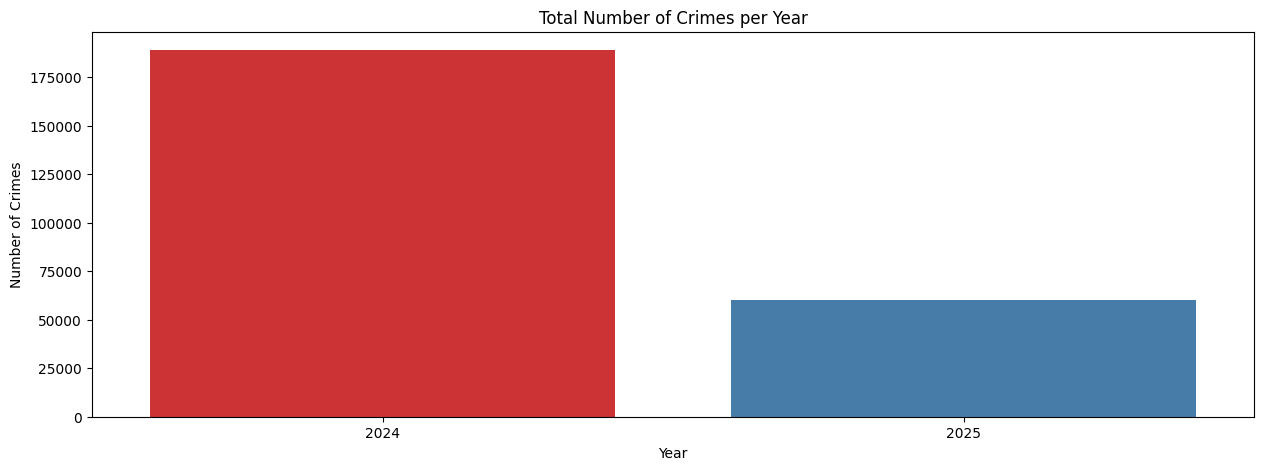

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='Year', palette='Set1')
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

<br>
<!-- <h4><span style="color: blue;">INSIGHT 1:</span> Crimes in Chicago was in peak in the year 2001 and 2002. Going forward, it shows a decline or downward pattern, in which shows that chicago crimes progresses decreasingly. The data visualization shows that almost half a million crimes were recorded in 2001. While the lowest recorded (excluding the current year) was in 2020 and 2021, with almost 200,000+ crime records. </h4> -->


<h4><span style="color: blue;">INSIGHT 1:</span> Crimes in Chicago was in peak in the year 2024. With over 175,000+ crime recorded. </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 2: TOTAL RECORDED CHICAGO CRIMES DISTRIBUTION BY MONTH.</h2>
<hr>

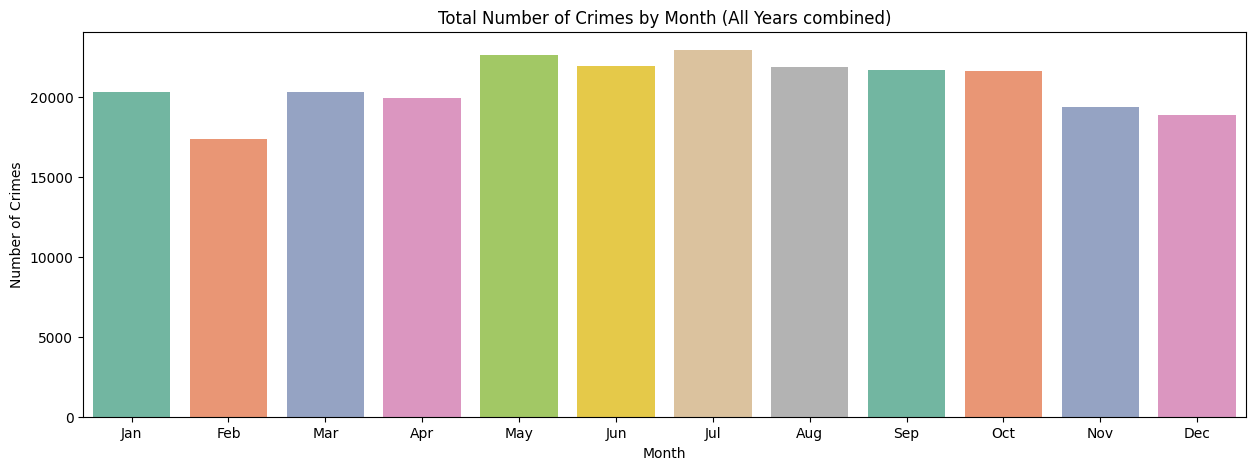

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='Month', palette='Set2')
plt.title('Total Number of Crimes by Month (All Years combined)')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Number of Crimes')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 2:</span> The data visualization shows that the month of July has the highest chicago crime records. Meaning that throughout the year 2001 to 2025, the most common month that an accident occurs was in the Month of July. With almost 20,000 crimes recorded.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 3: TOTAL RECORDED CHICAGO CRIMES DISTRIBUTION BY DAYS OF THE WEEK.</h2>
<hr>

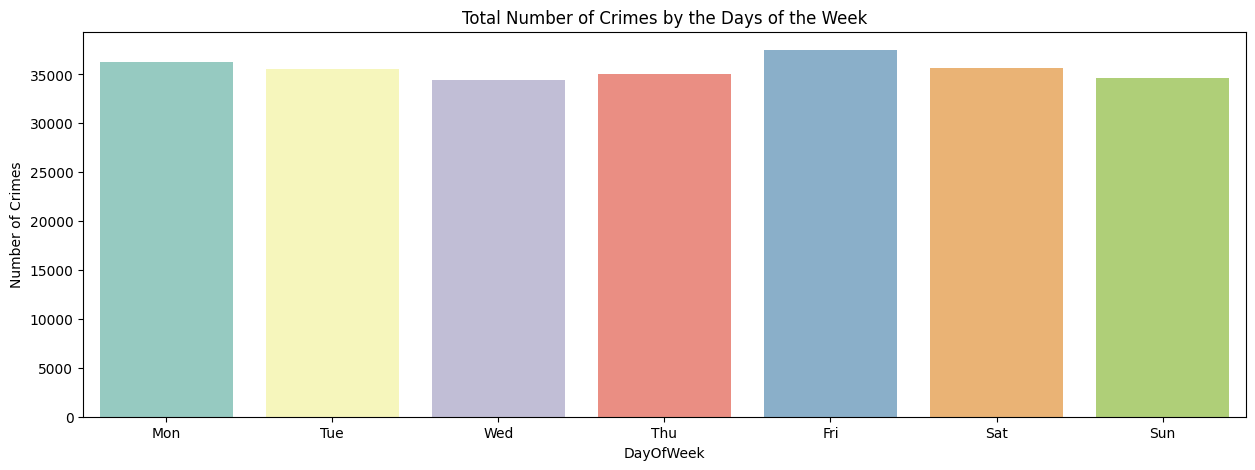

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='DayOfWeek', palette='Set3')
plt.title('Total Number of Crimes by the Days of the Week')
plt.xticks(range(0, 7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Number of Crimes')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 3:</span> The data visualization shows that Fridays have the most crimes recorded throughout the year 2001 to 2025. Meaning, that it is more common for a crime to happen in Fridays. In contrast, the visualization shows that Sundays have the lowest crimes level.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 4: TOTAL RECORDED CHICAGO CRIMES TREND BY HOUR OF DAY</h2>
<hr>

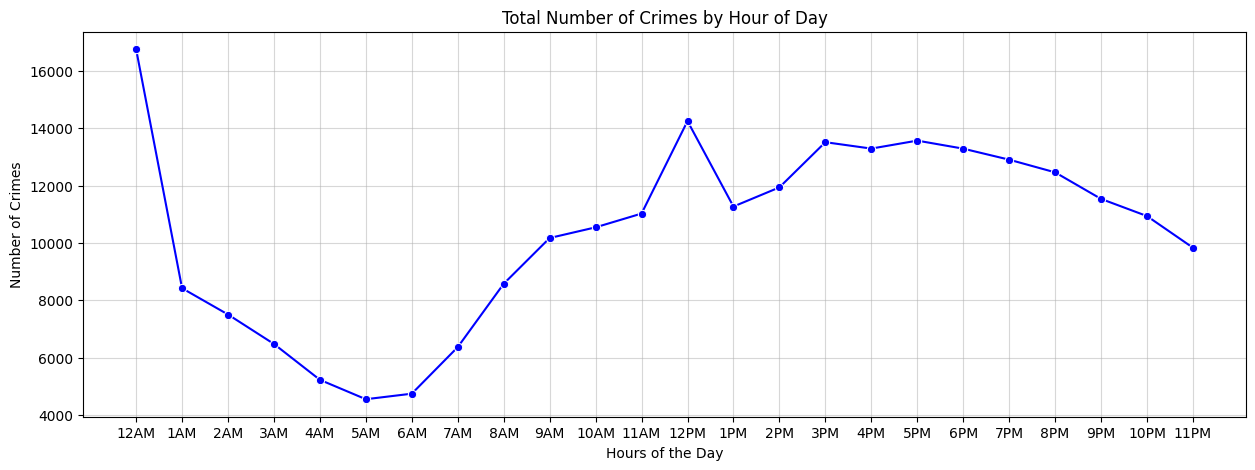

In [12]:
hour_of_day = data['HourOfDay'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x=hour_of_day.index, y=hour_of_day.values, marker="o", color="blue")
plt.grid(alpha=0.5)
plt.title("Total Number of Crimes by Hour of Day")
plt.xticks(
    range(0, 24),
    ['12AM','1AM','2AM','3AM','4AM','5AM',
     '6AM','7AM','8AM','9AM','10AM','11AM','12PM',
     '1PM','2PM','3PM','4PM','5PM','6PM',
     '7PM','8PM','9PM','10PM','11PM']
)
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 4:</span> The data visualization shows that 12AM midnight is the time that has the highest crimes recorded. As you can see at the visualization, in the early mornings(1PM - 8PM) shows that crimes are not that active since it had the lowest crimes recorded. Then comes afternoon to evening (12PM - onwards) shows that it had an increased when it comes to crimes. Meaning that crimes are more often when it is in night time.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 5: TOTAL CHICAGO CRIME DISTRIBUTION BASED ON ITS SEASON</h2>
<hr>

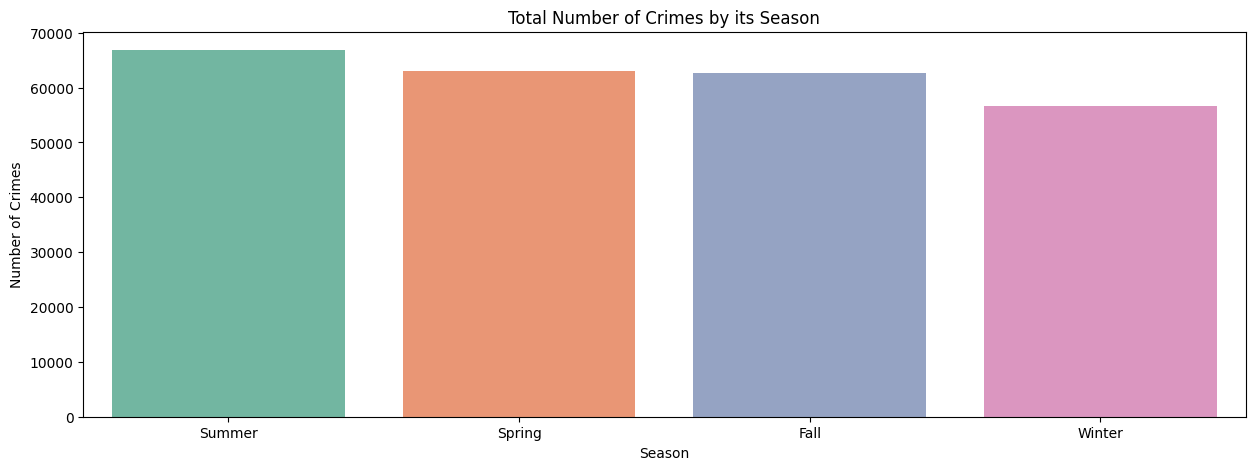

In [13]:
plt.figure(figsize=(15,5))

seasonal = data['Season'].value_counts()

sns.barplot(x=seasonal.index, y=seasonal.values, palette='Set2')
plt.title('Total Number of Crimes by its Season')
plt.ylabel('Number of Crimes')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 5:</span> the data visualization shows the total number of crimes categorized by season (Spring, Winter, Summer, Fall). Summer has the highest number of crimes, followed by Spring, Fall, and then Winter. Summer experiences the highest crime rate among all seasons, with over almost 70,000 crimes, while Winter has the lowest, with approximately almost 60,000. This suggests a potential correlation having more people outside and a warmer weather activity that urges people to go outside more, which results prone to chaos and criminal events.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 6: ARREST RATE PROGRESSION BY MONTHS THROUGHOUT THE YEAR </h2>
<hr>

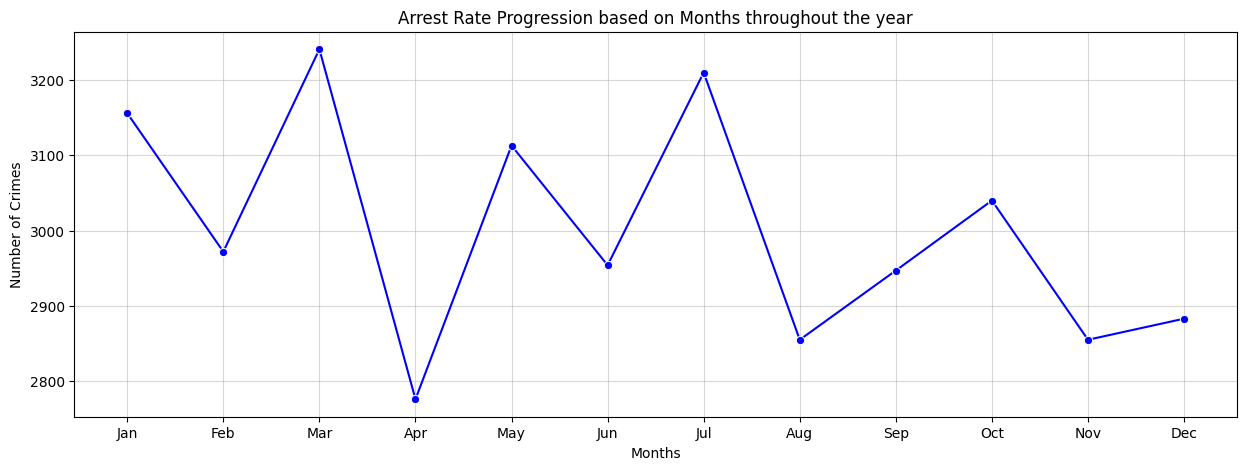

In [14]:
arrest = data[data['Arrest'] == True]
month_w_arrest = arrest['Month'].value_counts().sort_index()


plt.figure(figsize=(15, 5))
sns.lineplot(x=month_w_arrest.index, y=month_w_arrest.values, marker="o", color="blue")
plt.grid(alpha=0.5)
plt.title("Arrest Rate Progression based on Months throughout the year")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 6:</span> the data visualization shows monthly arrest trends over a year. Arrests peak sharply in March and July (both at 3,200+), dip to their lowest in April (less than 2,800), and shows moderate fluctuations. Meaning arrest activity is not evenly distributed across months — with notable spikes in early spring and mid-summer, and a significant drop in April. This may reflect policy changes, holiday patterns, or seasonal crime trends worth investigating further.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 7: CHICAGO CRIME PROPORTION OF THE TOP 10 MAJOR CRIMES THROUGHOUT THE YEAR </h2>
<hr>

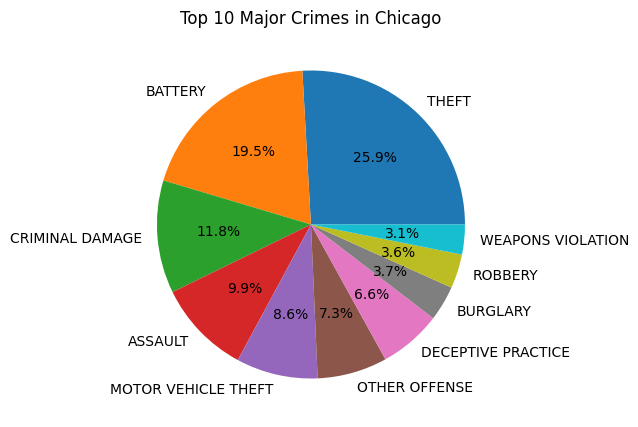

In [15]:
top10 = data['Primary Type'].value_counts().head(10)

plt.figure(figsize=(15,5))
plt.pie(top10, labels=top10.index, autopct = '%1.1f%%')
plt.title('Top 10 Major Crimes in Chicago')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 7:</span> the data visualization shows that Theft dominates as the most prevalent major crime at 25.9%, followed by Battery (19.5%) and Criminal Damage (11.8%). Together, these top three account for over half of all major crimes. Smaller categories like Weapons Violation (3.1%) and Robbery (3.6%) make up minimal shares — highlighting that property and assault-related offenses drive the majority of criminal activity in the city.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 8: CHICAGO CRIME PROPORTION OF THE TOP 10 MOST COMMON PLACES THAT A CRIME USUALLY HAPPENS AT</h2>
<hr>

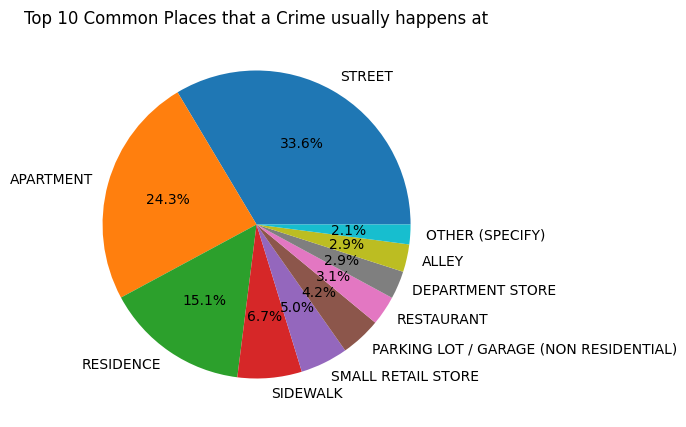

In [16]:
top10 = data['Location Description'].value_counts().head(10)

plt.figure(figsize=(15,5))
plt.pie(top10, labels=top10.index, autopct = '%1.1f%%')
plt.title('Top 10 Common Places that a Crime usually happens at')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 8:</span> the data visualization shows that crimes most frequently occur on Streets (33.6%), making them the single most common location — followed by Apartments (24.3%) and Residences (15.1%). Together, these three locations account for over 70% of all crime incidents. Public safety initiatives should prioritize street-level patrols and neighborhood engagement in residential and apartment areas </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 9: TOP 10 COMMUNITY AREAS WITH THE HIGHEST CRIME RECORDS IN CHICAGO.</h2>
<hr>

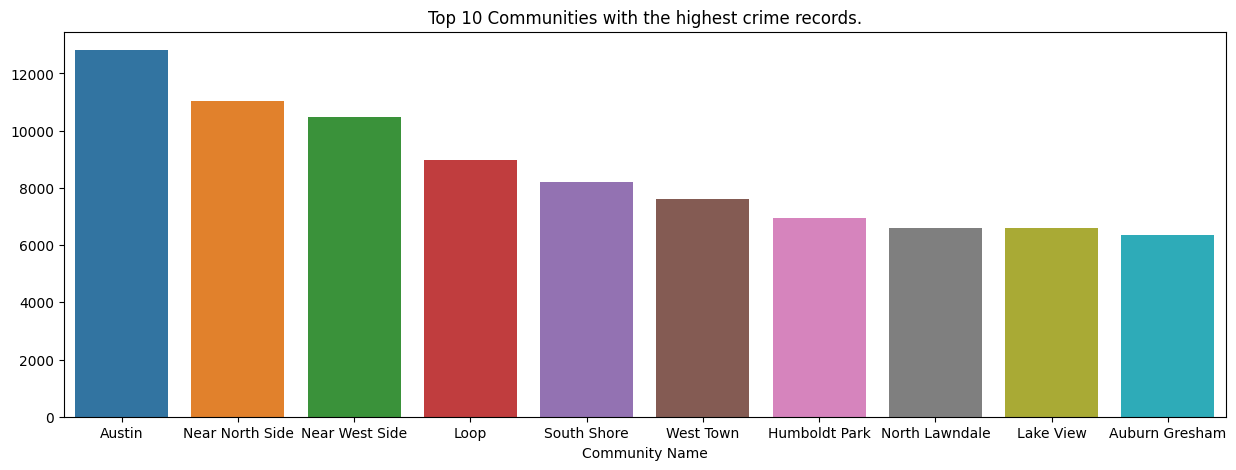

In [17]:
top10_areas = data['Community Name'].value_counts().head(10)

top10_areas
plt.figure(figsize=(15,5))
sns.barplot(x=top10_areas.index, y=top10_areas.values, palette='tab10')
plt.title('Top 10 Communities with the highest crime records.')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 9:</span> the data visualization shows that Austin leads with the highest crime count (~12,800), followed by Near North Side (~11,000) and Near West Side (~10,500). These top 3 communities account for a disproportionate share of crime — together exceeding 34,000 incidents. Crime rates drop significantly after the Loop (~9,000), with the bottom 5 communities averaging under 7,000 each.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 10: DOMESTIC VS. NON-DOMESTIC DISTRIBUTION THROUGHOUT THE YEAR</h2>
<hr>

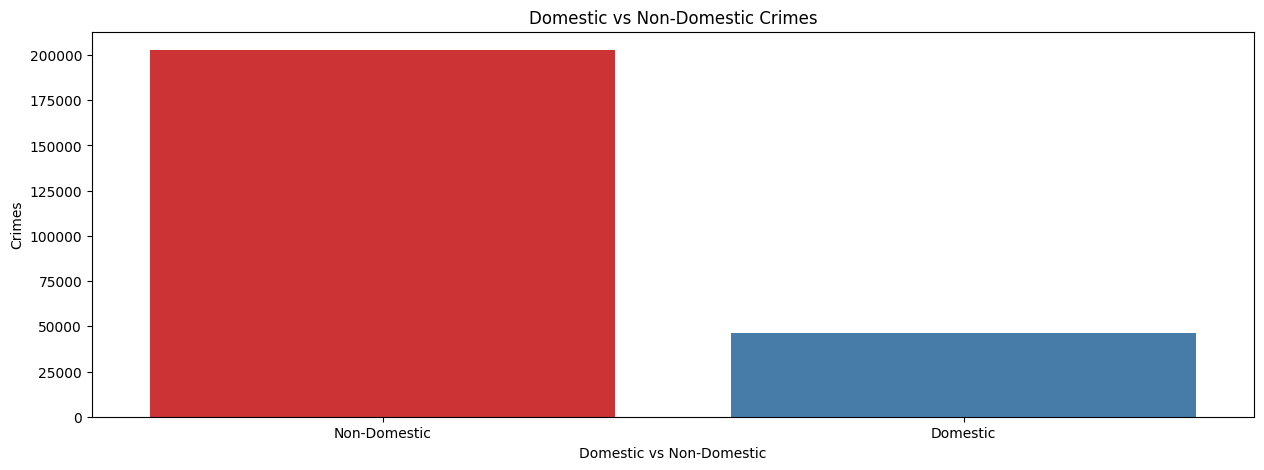

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='Domestic', palette="Set1")
plt.title("Domestic vs Non-Domestic Crimes")
plt.xticks(range(0,2),['Non-Domestic','Domestic'])
plt.xlabel("Domestic vs Non-Domestic")
plt.ylabel("Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 10:</span> Non-domestic crimes vastly outnumber domestic crimes. With ~200,000 vs. ~45,000 incidents, respectively. That’s over 4x more non-domestic crimes. While domestic violence remains a critical concern, law enforcement and prevention resources may need to be focused on broader public safety issues.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 11: TOP 3 MOST COMMON CRIMES COMMITTED IN SUMMER SEASONS</h2>
<hr>

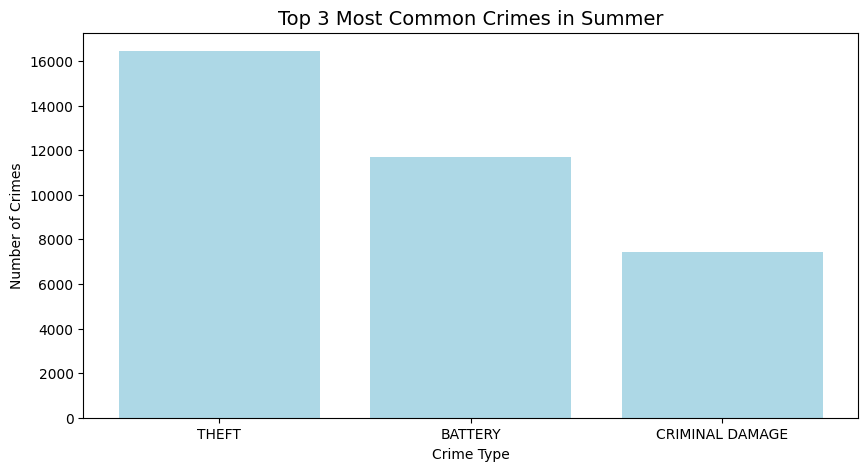

In [19]:
summer = data[data['Season'] == 'Summer']
top3 = summer['Primary Type'].value_counts().head(3)

plt.figure(figsize=(10, 5))
plt.bar(top3.index, top3.values, color='lightblue')
plt.title('Top 3 Most Common Crimes in Summer', fontsize=14)
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 11:</span> the data visualization shows that in summer, Theft is the most prevalent crime with 16,000 crimes recorded, followed by Battery 12,000 and Criminal Damage 7,500. Theft alone accounts for over 45% of the top 3 summer crimes.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 12: TOP 3 SAFEST COMMUNITIES (COMMUNITIES WITH LEAST CRIMES RECORDED) </h2>
<hr>

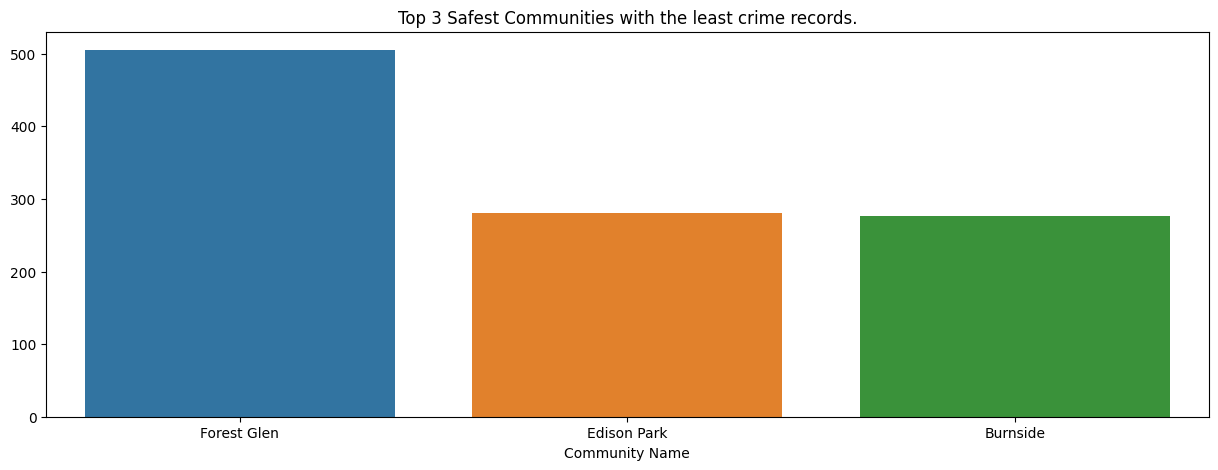

In [20]:
top3_areas = data['Community Name'].value_counts().tail(3)

top3_areas
plt.figure(figsize=(15,5))
sns.barplot(x=top3_areas.index, y=top3_areas.values, palette='tab10')
plt.title('Top 3 Safest Communities with the least crime records.')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 12:</span> The data visualization shows that Forest Glen, Edison Park, and Burnside are the safest communities that has the least crime recorded in Chicago. Despite being in the top 3 safest communities, Forest Glen still holds a 500+ crime records, while Edison Park and Burnside holds almost 300+. But still, if we were to compare  the three with the other communities, it is  undeniable that they still deserve to be in the top 3. </h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 13: TOP 10 SAFEST BLOCKS (BLOCKS WITH LEAST CRIMES RECORDED) </h2>
<hr>

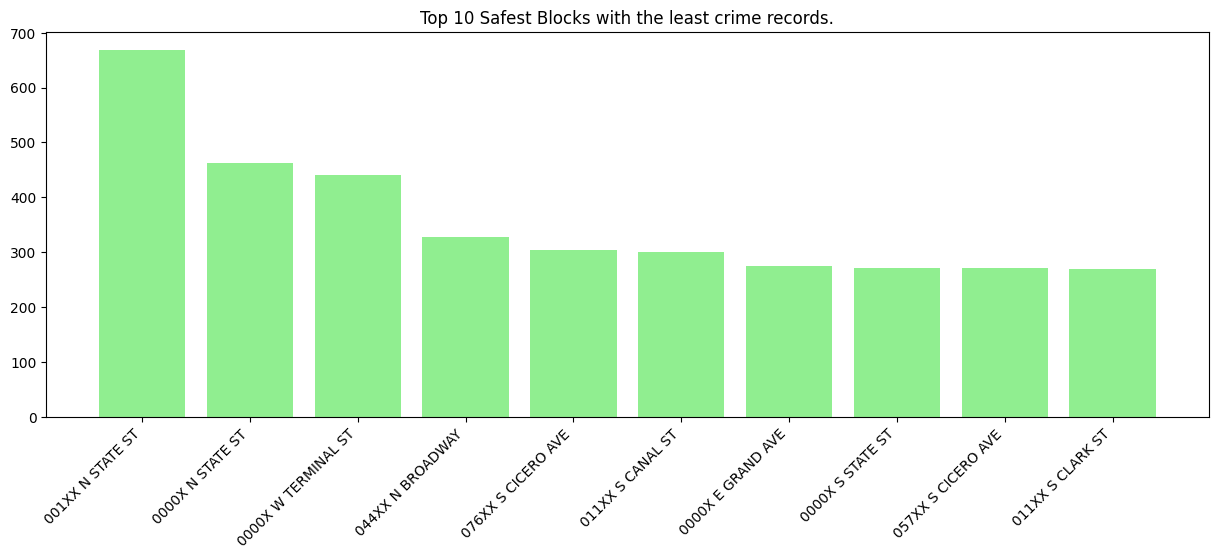

In [21]:
top10_blocks = data['Block'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,5))
plt.bar(top10_blocks.index,top10_blocks.values,color='lightgreen')
plt.title('Top 10 Safest Blocks with the least crime records.')
plt.xticks(rotation=45, ha="right") 
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 13:</span> Despite appearing high in absolute numbers (270–670 crimes), these Top 10 “Safest” Blocks are actually the least crime-ridden among the other blocks.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 14: CRIME TYPES DISTRIBUTION IN THE COMMUNITY AREA OF AUSTIN (COMMUNITY WITH HIGHEST CRIME RECORD)</h2>
<hr>

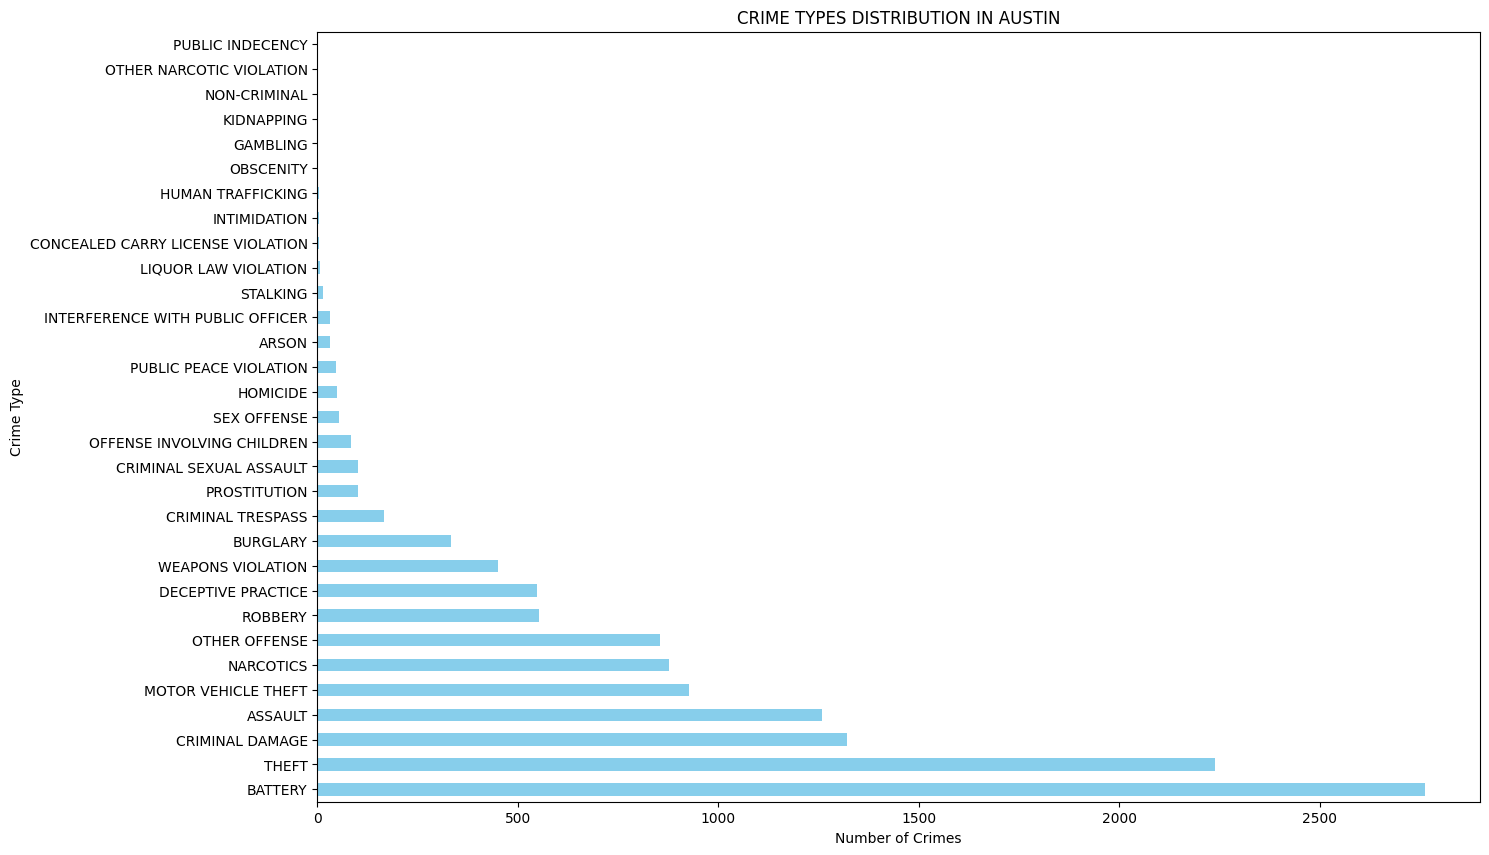

In [22]:
austin = data[data['Community Name'] == 'Austin']

plt.figure(figsize=(15,10))
austin['Primary Type'].value_counts().plot(kind='barh', color="skyblue")
plt.title("CRIME TYPES DISTRIBUTION IN AUSTIN")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 14:</span> In Austin, Battery is the most prevalent crime with 2,700 records, followed by Theft 2,200 and Criminal Damage 1,400. Together, these top 3 account for over half of all reported crimes. Violent and property offenses dominate — while rare crimes like Kidnapping, Human Trafficking, or Arson are near negligible.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 15: ARREST RATE PROGRESSION OF CRIMES BY MONTHS IN AUSTIN THROUGHOUT THE YEAR </h2>
<hr>

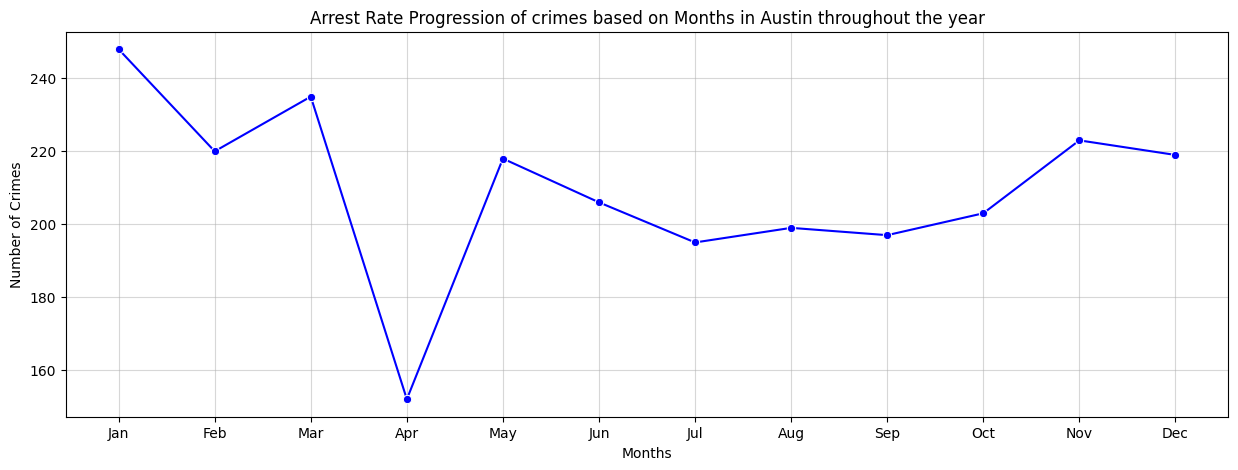

In [23]:
austin_arrest = austin[austin['Arrest'] == True]
austin_w_arrest = austin_arrest['Month'].value_counts().sort_index()


plt.figure(figsize=(15, 5))
sns.lineplot(x=austin_w_arrest.index, y=austin_w_arrest.values, marker="o", color="blue")
plt.grid(alpha=0.5)
plt.title("Arrest Rate Progression of crimes based on Months in Austin throughout the year")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 15:</span>In Austin, arrest rates fluctuate seasonally, peaking in January 245 crimes with arrest and March 235 crimes with arrest, then plunging to the annual low in April 150 crimes with arrest. A moderate rebound occurs through summer and fall, with a second peak in November 220 crimes with arrest before tapering in December.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 16: LOCATION OR PLACE DISTRIBUTION OF CRIMES RECORDED IN AUSTIN</h2>
<hr>

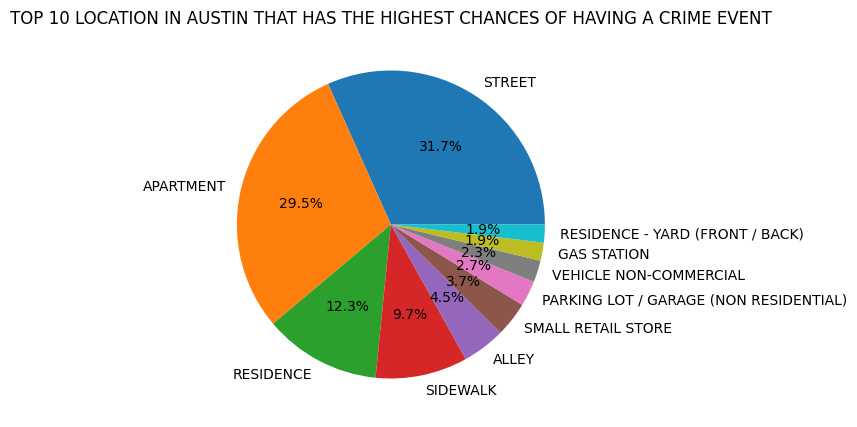

In [24]:
austin = data[data['Community Name'] == 'Austin']
austin_loc = austin['Location Description'].value_counts().head(10)
austin_loc

plt.figure(figsize=(15,5))
plt.pie(austin_loc, labels=austin_loc.index, autopct = '%1.1f%%')
plt.title('TOP 10 LOCATION IN AUSTIN THAT HAS THE HIGHEST CHANCES OF HAVING A CRIME EVENT')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 16:</span> In Austin, Streets 31.7% and Apartments 29.5% are the top two locations where crimes are most likely to occur — together accounting for over 60% of all crime events. Residences 12.3% and Sidewalks 9.7% follow, while smaller venues like alleys, gas stations, or parking lots make up minimal shares. Public safety efforts should prioritize street-level patrols and apartment complex security initiatives.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 17: GEOSPATIAL LOCATION(HOTSPOTS) OF BATTERY CRIME RECORDS COMMITED AT STREETS IN AUSTIN</h2>
<hr>

In [26]:
austin_street = austin[(austin['Location Description'] == 'STREET') & (austin['Primary Type'] == 'BATTERY')]

locations = list(zip(austin_street['Latitude'], austin_street['Longitude']))
m = folium.Map(location = [austin_street['Latitude'].mean(), austin_street['Longitude'].mean()], zoom_start = 13)
HeatMap(locations).add_to(m)
m.save('heatmaps\\austin_Analysis16.html')
m

<br>
<h4><span style="color: blue;">INSIGHT 17:</span> This heatmap reveals multiple high-crime hotspots concentrated in Austin Community. Especially in the South Part of Austin. If you were to zoom at the map, you'll see that there are more of the intense red zones that indicate peak crime density along major corridors like West Lake Street and Jackson Boulevard. Crime is not uniformly distributed</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 18: CRIME TYPES DISTRIBUTION IN THE COMMUNITY AREA OF NEAR NORTH SIDE (2ND COMMUNITY WITH HIGHEST CRIME RECORD)</h2>
<hr>

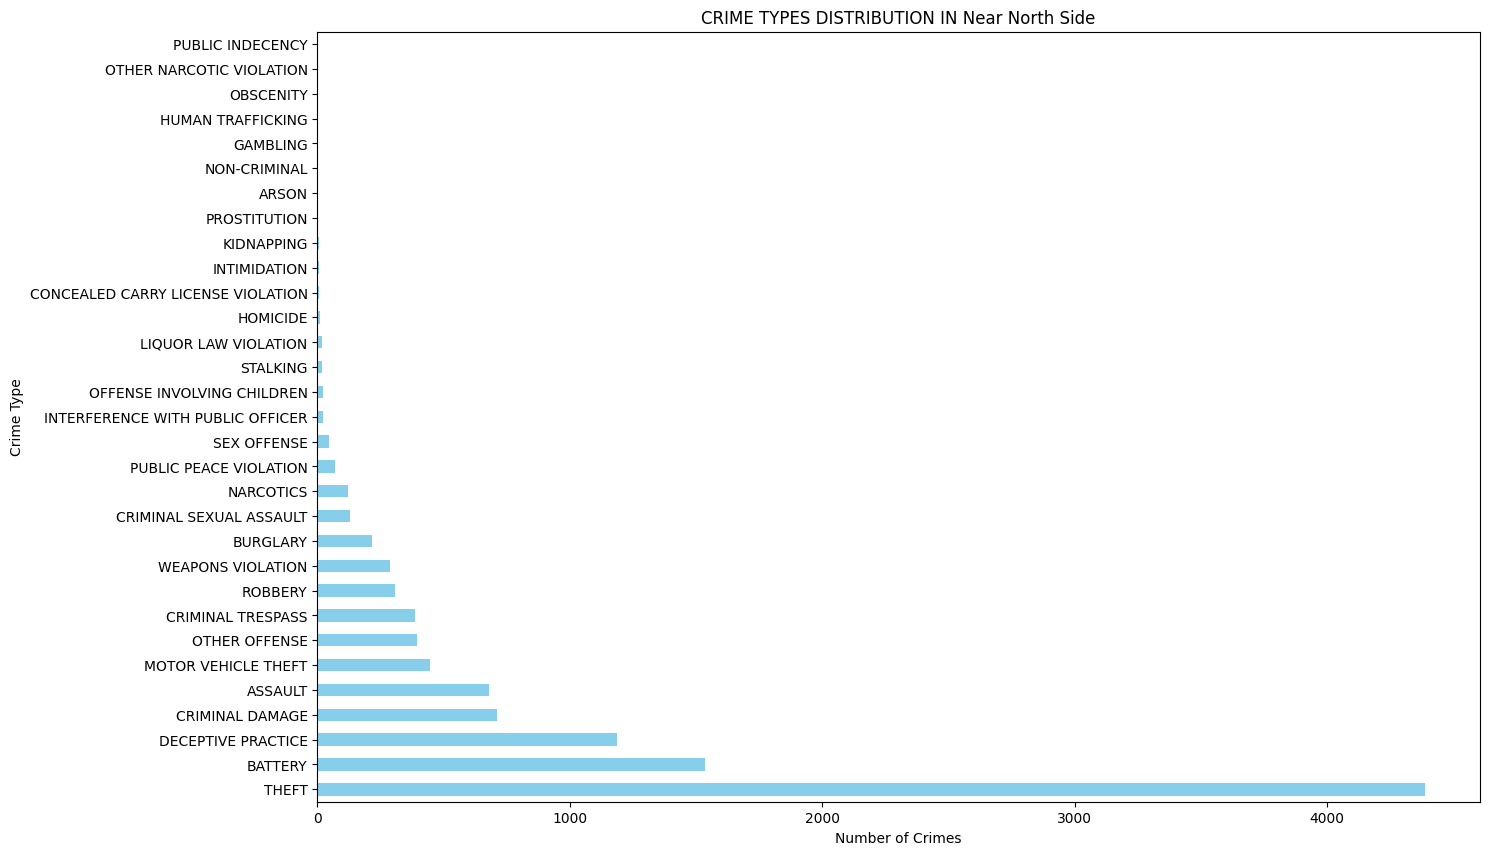

In [27]:
near_north_side = data[data['Community Name'] == 'Near North Side']

plt.figure(figsize=(15,10))
near_north_side['Primary Type'].value_counts().plot(kind='barh', color="skyblue")
plt.title("CRIME TYPES DISTRIBUTION IN Near North Side")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 18:</span> In Near North Side, Theft is the dominant crime by far 4,500 crimes, followed by Battery 1,600 and Deceptive Practice 1,200. Together, these top 3 account for over half of all reported crimes. Violent and property offenses dominate, while serious but rare crimes (e.g., Homicide, Kidnapping, Human Trafficking) are near negligible in volume.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 19: ARREST RATE PROGRESSION OF CRIMES BY MONTHS IN NEAR NORTH SIDE THROUGHOUT THE YEAR </h2>
<hr>

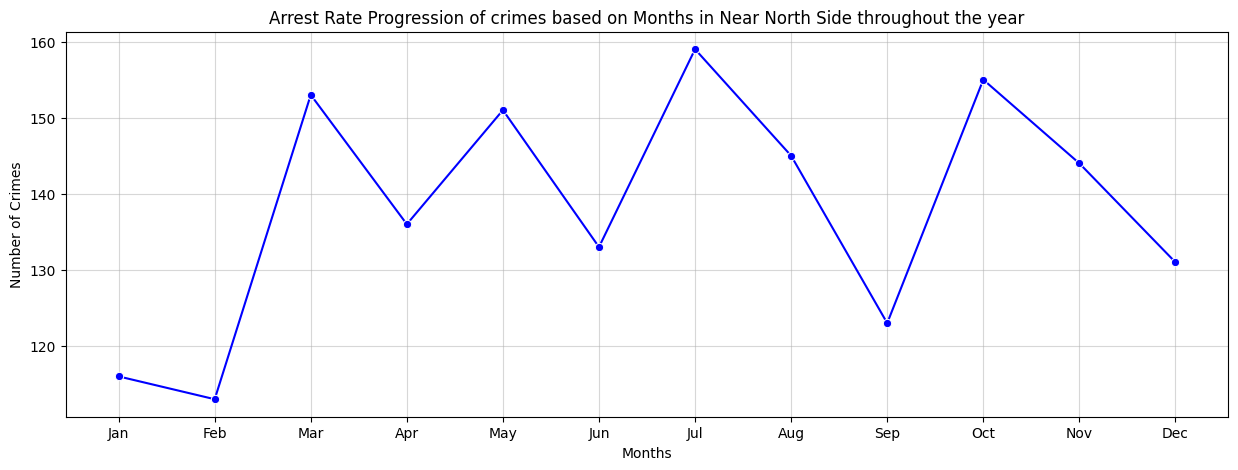

In [28]:
near_north_side_arrest = near_north_side[near_north_side['Arrest'] == True]
near_north_side_w_arrest = near_north_side_arrest['Month'].value_counts().sort_index()


plt.figure(figsize=(15, 5))
sns.lineplot(x=near_north_side_w_arrest.index, y=near_north_side_w_arrest.values, marker="o", color="blue")
plt.grid(alpha=0.5)
plt.title("Arrest Rate Progression of crimes based on Months in Near North Side throughout the year")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 19:</span> In Near North Side, arrest rates show strong seasonal spikes — peaking in July 160 crimes with arrest and October 155 crimes with arrest, with notable dips in February 113 crimes with arrest and September 123 crimes with arrest. The pattern suggests higher enforcement or crime volume during summer and fall months.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 20: LOCATION OR PLACE DISTRIBUTION OF CRIMES RECORDED IN NEAR NORTH SIDE</h2>
<hr>

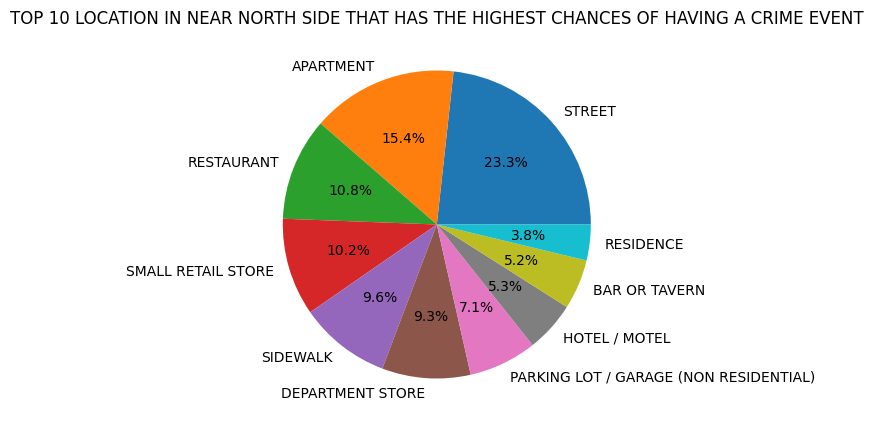

In [29]:
near_north_side_loc = near_north_side['Location Description'].value_counts().head(10)


plt.figure(figsize=(15,5))
plt.pie(near_north_side_loc, labels=near_north_side_loc.index, autopct = '%1.1f%%')
plt.title('TOP 10 LOCATION IN NEAR NORTH SIDE THAT HAS THE HIGHEST CHANCES OF HAVING A CRIME EVENT')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 20:</span> In the Near North Side, Streets 23.3% and Apartments 15.4% are the top two locations for crime, together accounting for nearly 40% of all incidents. Restaurants 10.8% and Small Retail Stores 10.2% follow, indicating commercial zones also face significant risk.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 21: GEOSPATIAL LOCATION(HOTSPOTS) OF THEFT CRIME RECORDS COMMITED AT STREETS IN NEAR NORTH SIDE</h2>
<hr>

In [30]:
near_north_side_street = near_north_side[(near_north_side['Location Description'] == 'STREET') & (near_north_side['Primary Type'] == 'THEFT')]

locations = list(zip(near_north_side_street['Latitude'], near_north_side_street['Longitude']))
m = folium.Map(location = [near_north_side_street['Latitude'].mean(), near_north_side_street['Longitude'].mean()], zoom_start = 13)
HeatMap(locations).add_to(m)
m.save('heatmaps\\nearnorthside_Analysis21.html')
m

<br>
<h4><span style="color: blue;">INSIGHT 21:</span> Theft crimes on streets in Near North Side are heavily concentrated around the Southwest part of Near North Side. Along North Michigan Avenue, East Ohio Street, and near the Magnificent Mile, as well as clusters around Goose Island, River North, and near the Chicago River bridges.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 22: CRIME TYPES DISTRIBUTION IN THE COMMUNITY AREA OF NEAR WEST SIDE (3ND COMMUNITY WITH HIGHEST CRIME RECORD)</h2>
<hr>

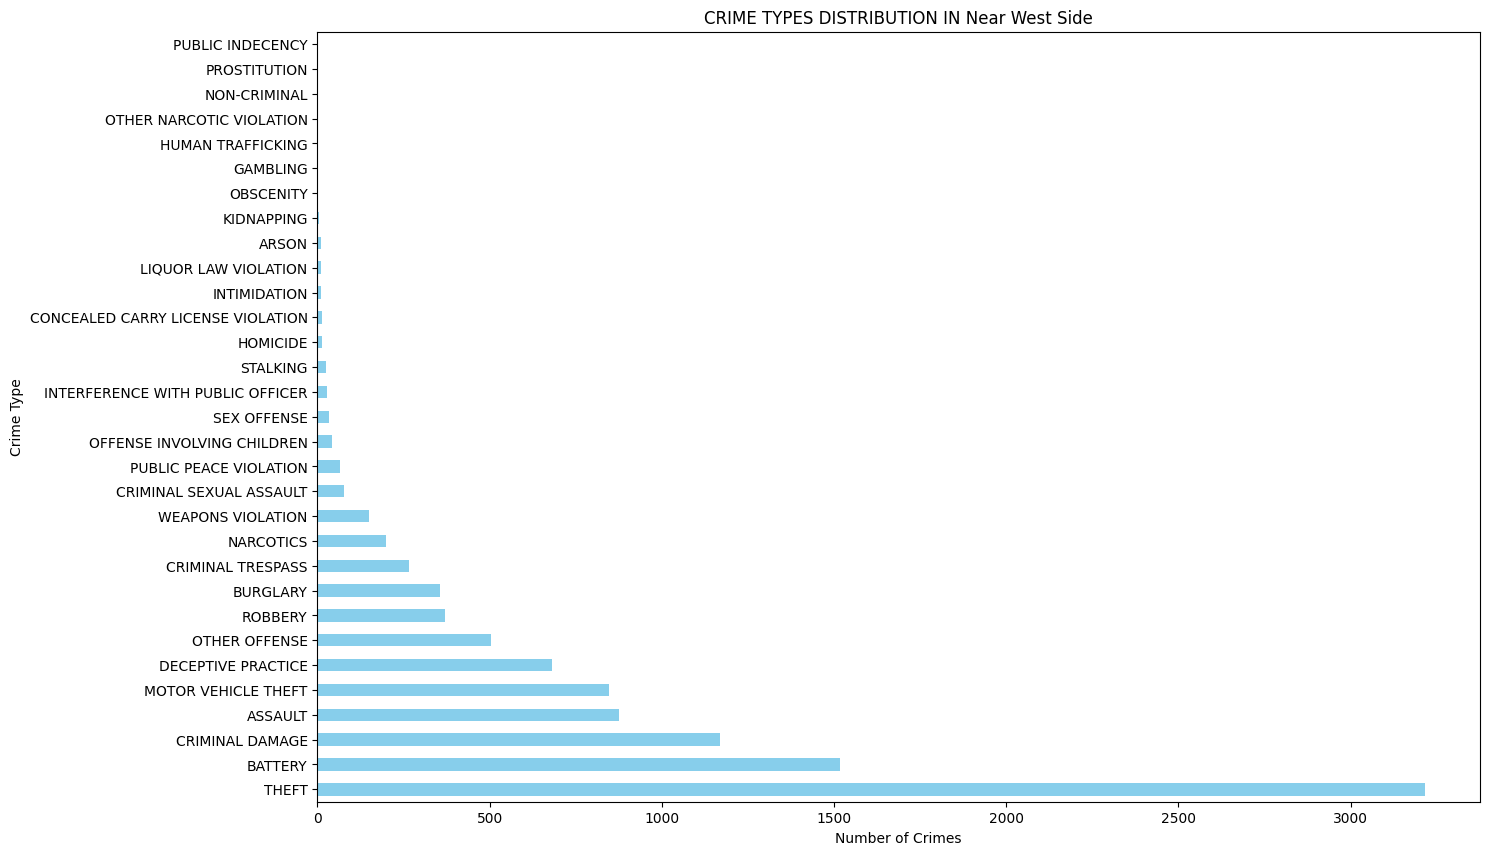

In [31]:
near_west_side = data[data['Community Name'] == 'Near West Side']

plt.figure(figsize=(15,10))
near_west_side['Primary Type'].value_counts().plot(kind='barh', color="skyblue")
plt.title("CRIME TYPES DISTRIBUTION IN Near West Side")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 22:</span> In the Near North Side, Theft dominates crime activity 3,200 records, followed by Battery 1,500 and Criminal Damage 1,200. Together, these top 3 account for over half of all reported crimes. Violent and property offenses drive the majority — while serious crimes like Homicide, Kidnapping, or Human Trafficking are extremely rare.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 23: ARREST RATE PROGRESSION OF CRIMES BY MONTHS IN NEAR WEST SIDE THROUGHOUT THE YEAR </h2>
<hr>

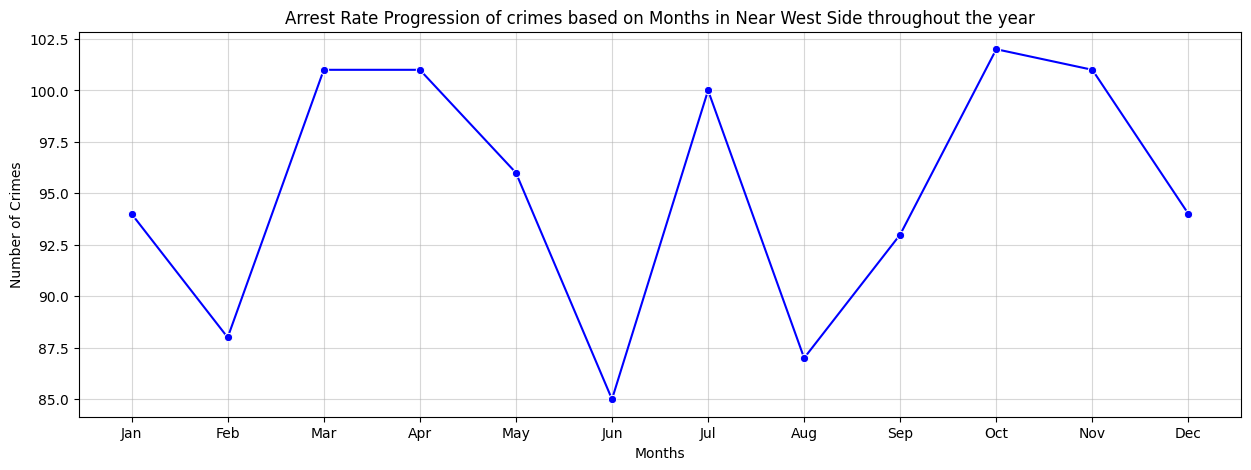

In [32]:
near_west_side_arrest = near_west_side[near_west_side['Arrest'] == True]
near_west_side_w_arrest = near_west_side_arrest['Month'].value_counts().sort_index()


plt.figure(figsize=(15, 5))
sns.lineplot(x=near_west_side_w_arrest.index, y=near_west_side_w_arrest.values, marker="o", color="blue")
plt.grid(alpha=0.5)
plt.title("Arrest Rate Progression of crimes based on Months in Near West Side throughout the year")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 23:</span> In the Near West Side, arrest rates fluctuate moderately throughout the year — peaking in March, April, and October  101–102 crimes with arrest, with sharp dips in February 88 crimes with arrest and June 85 crimes with arrest. The pattern suggests seasonal enforcement or crime spikes tied to weather, events, or policing cycles.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 24: LOCATION OR PLACE DISTRIBUTION OF CRIMES RECORDED IN NEAR WEST SIDE</h2>
<hr>

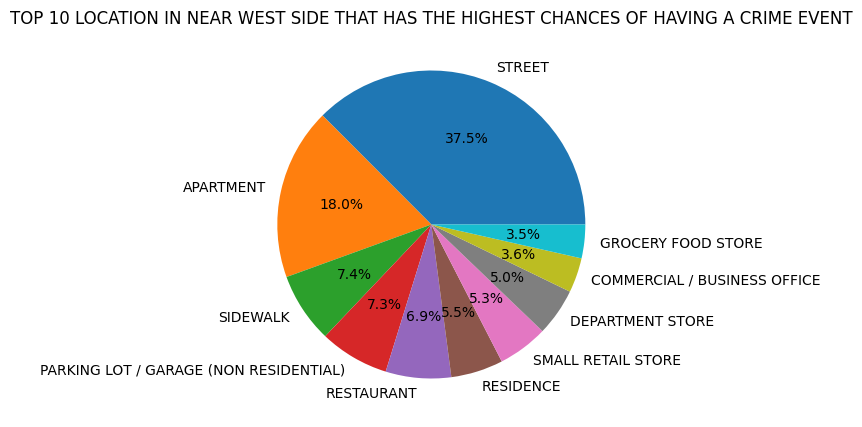

In [33]:
near_west_side_loc = near_west_side['Location Description'].value_counts().head(10)


plt.figure(figsize=(15,5))
plt.pie(near_west_side_loc, labels=near_west_side_loc.index, autopct = '%1.1f%%')
plt.title('TOP 10 LOCATION IN NEAR WEST SIDE THAT HAS THE HIGHEST CHANCES OF HAVING A CRIME EVENT')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 24:</span> In the Near West Side, Streets 37.5% are by far the most common location for crime, nearly double the next highest category, Apartments 18.0%. Together, they account for over half of all crime events. Commercial spaces like restaurants, retail stores, and parking lots make up smaller but notable shares.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 25: GEOSPATIAL LOCATION(HOTSPOTS) OF THEFT CRIME RECORDS COMMITED AT STREETS IN NEAR WEST SIDE</h2>
<hr>

In [34]:
near_west_side_street = near_west_side[(near_west_side['Location Description'] == 'STREET') & (near_west_side['Primary Type'] == 'THEFT')]

locations = list(zip(near_west_side_street['Latitude'], near_west_side_street['Longitude']))
m = folium.Map(location = [near_west_side_street['Latitude'].mean(), near_west_side_street['Longitude'].mean()], zoom_start = 13)
HeatMap(locations).add_to(m)
m.save('heatmaps\\nearwestside_Analysis25.html')
m

<br>
<h4><span style="color: blue;">INSIGHT 25:</span> This heatmap reveals intense crime concentration in the Near West Side, particularly around the Northeast part of the community area. Bright red zones indicate peak activity along major arteries like West Randolph Street and West Lake Street.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 26: CRIME TYPES DISTRIBUTION IN THE COMMUNITY AREA OF BURNSIDE (SAFEST COMMUNITY AREA WITH LEAST CRIME RECORD)</h2>
<hr>

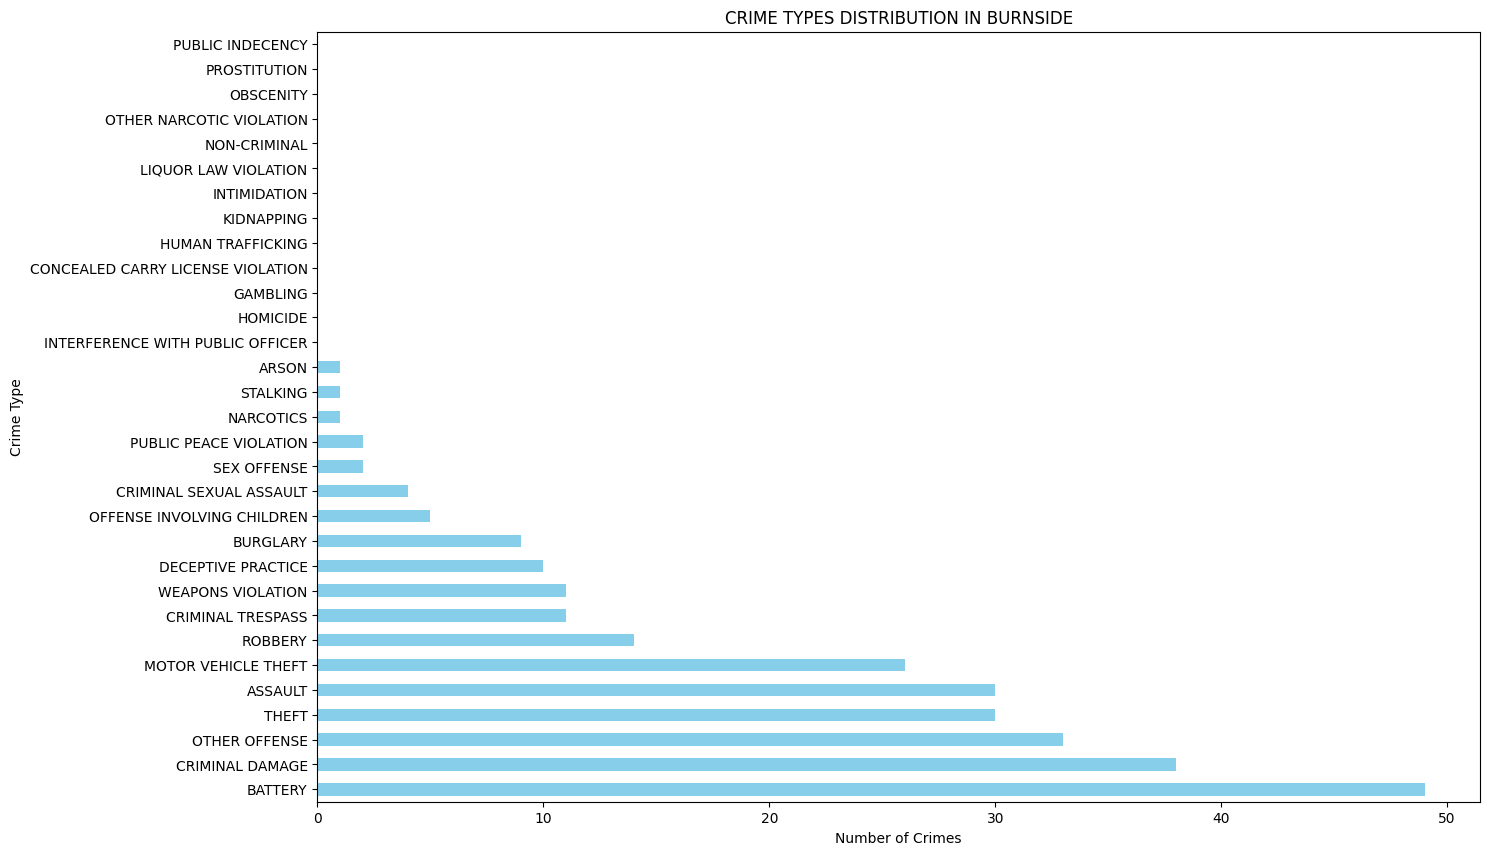

In [35]:
burnside = data[data['Community Name'] == 'Burnside']

plt.figure(figsize=(15,10))
burnside['Primary Type'].value_counts().plot(kind='barh', color="skyblue")
plt.title("CRIME TYPES DISTRIBUTION IN BURNSIDE")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 26:</span> In Burnside, Battery is the most frequent crime 49 records, followed by Criminal Damage 38 records and Other Offense 35 records. Theft, Assault, and Motor Vehicle Theft also rank high, confirming a pattern dominated by violent and property crimes. Serious offenses like Homicide, Kidnapping, or Human Trafficking are extremely rare (near zero).</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 27: ARREST RATE PROGRESSION OF CRIMES BY MONTHS IN BURNSIDE THROUGHOUT THE YEAR </h2>
<hr>

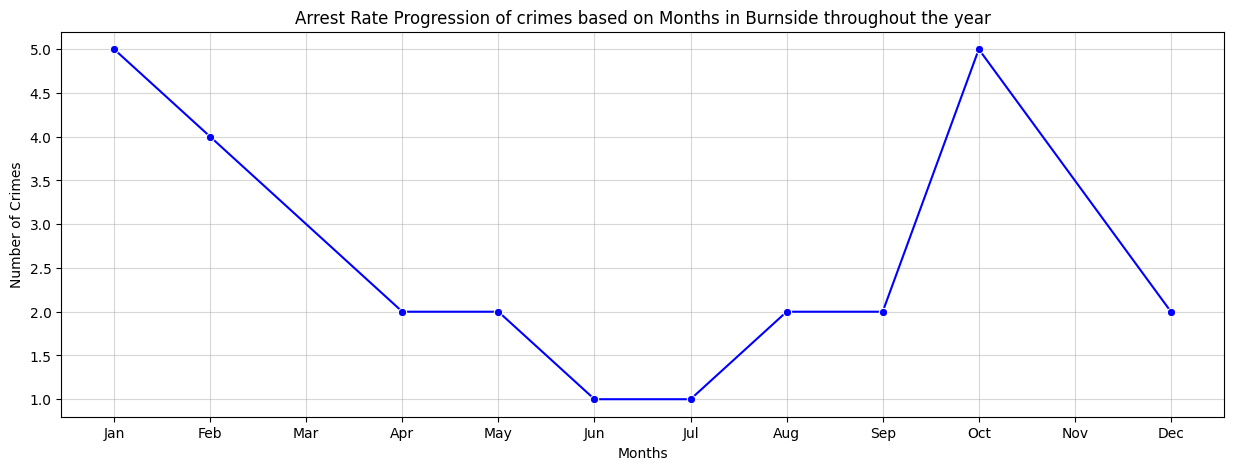

In [36]:
burnside_arrest = burnside[burnside['Arrest'] == True]
burnside_w_arrest = burnside_arrest['Month'].value_counts().sort_index()


plt.figure(figsize=(15, 5))
sns.lineplot(x=burnside_w_arrest.index, y=burnside_w_arrest.values, marker="o", color="blue")
plt.grid(alpha=0.5)
plt.title("Arrest Rate Progression of crimes based on Months in Burnside throughout the year")
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 27:</span> In Burnside, arrest rates are extremely low overall — with monthly crime counts rarely exceeding 5. Peaks occur in January (5.0) and October (5.0), while the lowest points are in June and July (1.0 each). The pattern suggests minimal crime activity year-round, with slight seasonal upticks in early and late year.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 28: LOCATION OR PLACE DISTRIBUTION OF CRIMES RECORDED IN BURNSIDE</h2>
<hr>

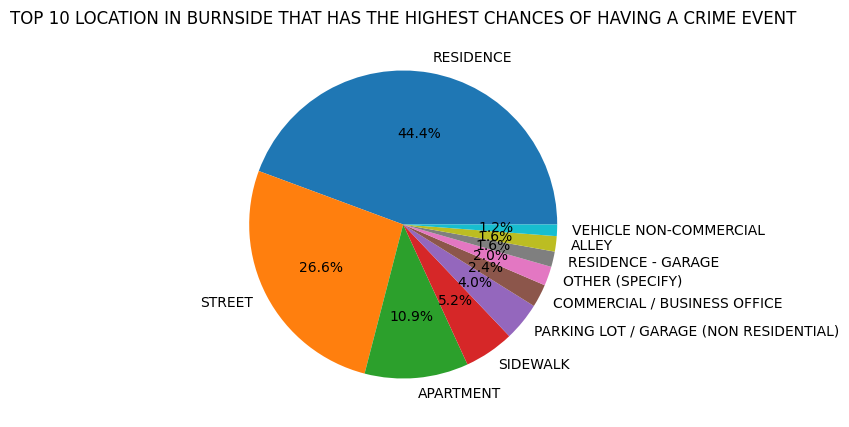

In [37]:
burnside_loc = burnside['Location Description'].value_counts().head(10)


plt.figure(figsize=(15,5))
plt.pie(burnside_loc, labels=burnside_loc.index, autopct = '%1.1f%%')
plt.title('TOP 10 LOCATION IN BURNSIDE THAT HAS THE HIGHEST CHANCES OF HAVING A CRIME EVENT')
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 28:</span> In Burnside, Residences 44.4% are the most common location for crime nearly half of all incidents, followed by Streets 26.6% and Apartments 10.9%. Together, these three account for over 80% of crime events, indicating that crime is primarily concentrated in residential and immediate public spaces.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 29: GEOSPATIAL LOCATION(HOTSPOTS) OF BATTERY CRIME RECORDS COMMITED AT RESIDENCE IN BURNSIDE</h2>
<hr>

In [38]:
burnside_street = burnside[(burnside['Location Description'] == 'RESIDENCE') & (burnside['Primary Type'] == 'BATTERY')]

locations = list(zip(burnside_street['Latitude'], burnside_street['Longitude']))
m = folium.Map(location = [burnside_street['Latitude'].mean(), burnside_street['Longitude'].mean()], zoom_start = 16)
HeatMap(locations).add_to(m)
m.save('heatmaps\\burnside_Analysis29.html')
m

<br>
<h4><span style="color: blue;">INSIGHT 29:</span> This heatmap isolates battery crimes committed at residences in Burnside, revealing concentrated hotspots centered around East 92nd Street & South Eberhart Avenue, with secondary clusters near South University Avenue. The red zone indicates the highest density of residential battery incidents.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 30: ARREST RATE PROGRESSION OF VARIOUS CRIME TYPE</h2>
<hr>

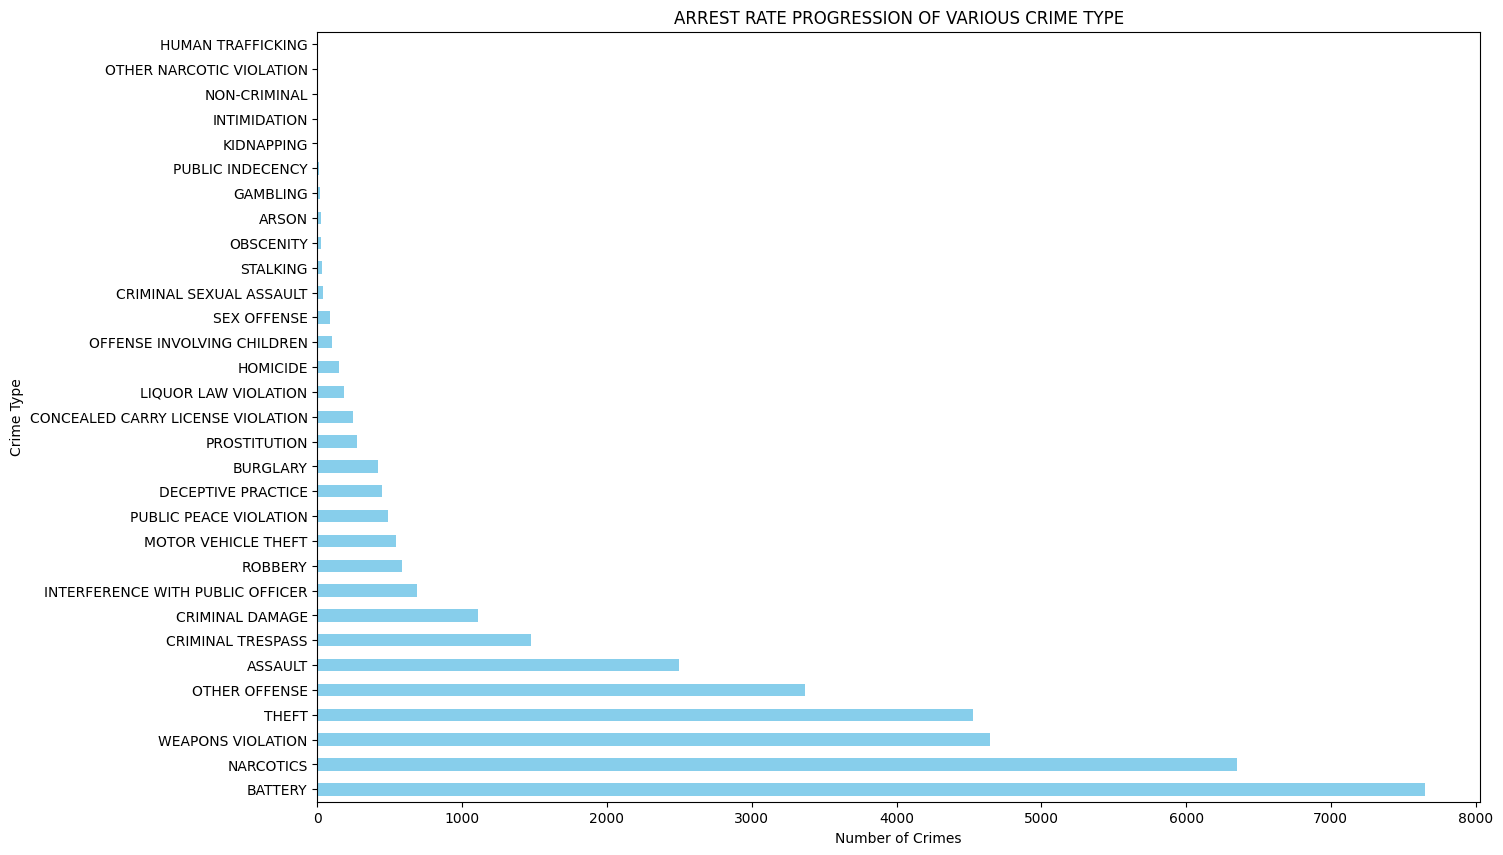

In [39]:
arrest = data[data['Arrest'] == True]

plt.figure(figsize=(15,10))
arrest['Primary Type'].value_counts().plot(kind='barh', color="skyblue")
plt.title("ARREST RATE PROGRESSION OF VARIOUS CRIME TYPE")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 30:</span> This chart shows arrest rates by crime type across the city, revealing that Battery leads with 7,700+ arrests, followed by Narcotics 6,500+ and Weapons Violation 4,500+. Together, these top 3 account for over half of all arrests. Crimes like Theft, Assault, and Other Offense also rank high, confirming a pattern dominated by violent, drug-related, and property offenses.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 31: TOP 10 BEATS THAT HAD THE HIGHEST REPORTED CRIMES</h2>
<hr>

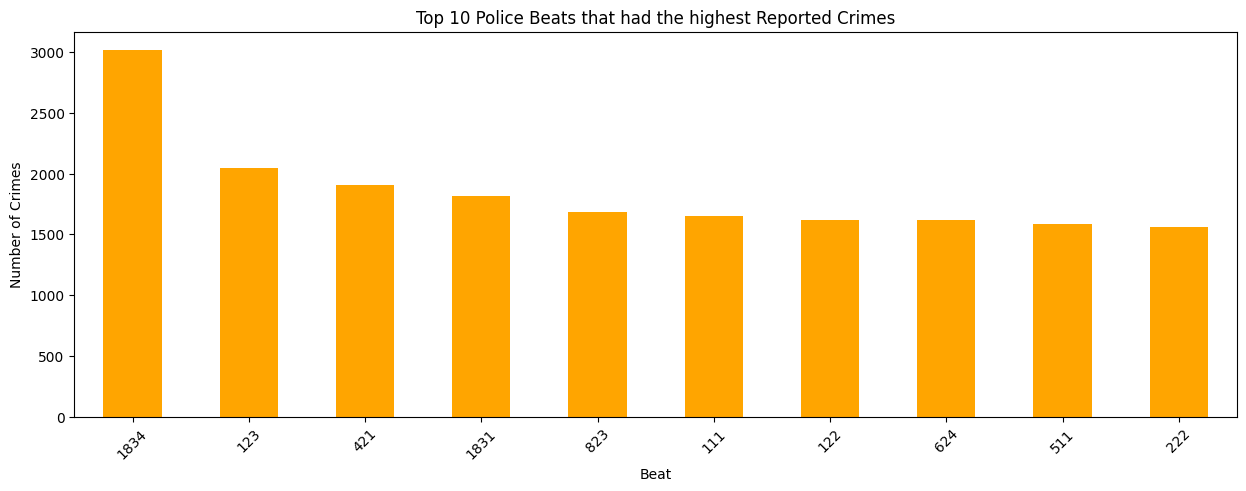

In [40]:
beat_counts = data['Beat'].value_counts().head(10)

beat_counts.plot(kind='bar', color='orange', figsize=(15,5))
plt.title("Top 10 Police Beats that had the highest Reported Crimes")
plt.xlabel("Beat")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 31:</span> Police Beat 1834 leads with 3,000 reported crimes, significantly higher than the next highest (Beat 123, 2,000). The top 10 beats range from 1,500 to 3,000 crimes, indicating concentrated crime hotspots across specific patrol zones.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 32: TOP 10 FREQUENT IUCR REPORTS RECORDED</h2>
<hr>

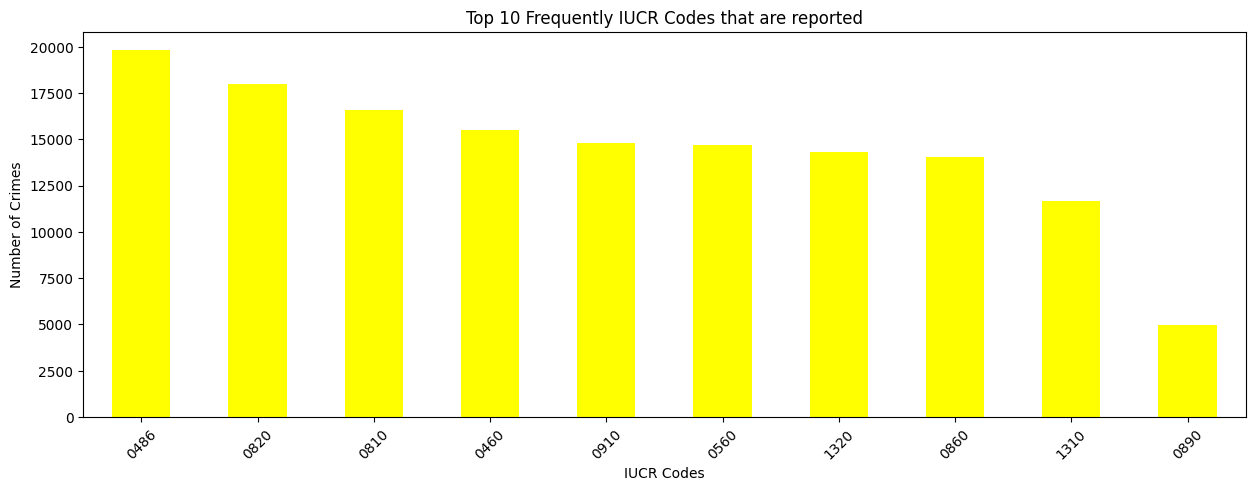

In [41]:
iucr_codes = data['IUCR'].value_counts().head(10)

iucr_codes.plot(kind='bar', color='yellow', figsize=(15,5))
plt.title("Top 10 Frequently IUCR Codes that are reported")
plt.xlabel("IUCR Codes")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 32:</span> This chart shows the Top 10 Most Frequently Reported IUCR Codes, standardized crime classification codes used by law enforcement. IUCR 0486(Battery – Simple (Non-Aggravated)) leads with almost 20,000 crimes reported, followed by 0820 (Theft – Pocket Picking / Pickpocketing) 18,000+ and 0810 (Theft – From Building) 17,000+. These top codes represent the most common types of crimes reported citywide.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 33:TOP 10 COMMON CRIME DESCRIPTIONS RECORDED</h2>
<hr>

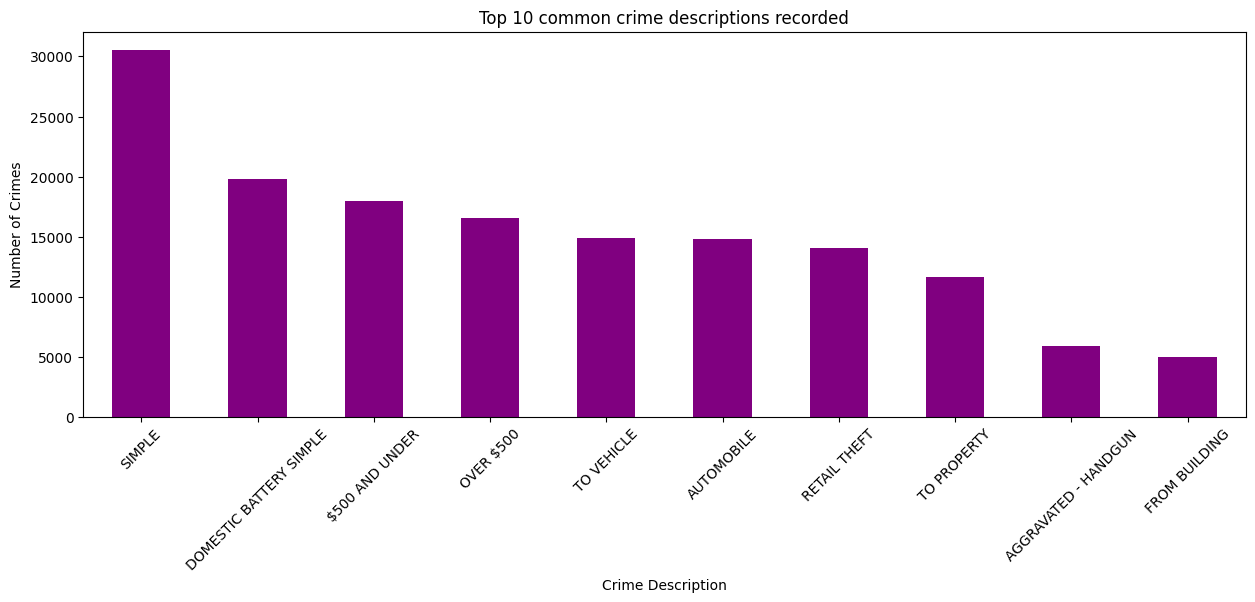

In [42]:
crime_desc = data['Description'].value_counts().head(10)

crime_desc.plot(kind='bar', color='purple', figsize=(15,5))
plt.title("Top 10 common crime descriptions recorded")
plt.xlabel("Crime Description")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 33:</span> the visualization shows the Top 10 Most Common Crime Descriptions Recorded, with “SIMPLE” (likely Simple Battery or Assault) leading at 30,000+ records, followed by “DOMESTIC BATTERY SIMPLE” 20,000 records, and “$500 AND UNDER” (theft under $500 at 18,000 records). These top categories reflect a dominance of low-level violent and property crimes.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 34:TOP 10 FBI CODE CATEGORIES</h2>
<hr>

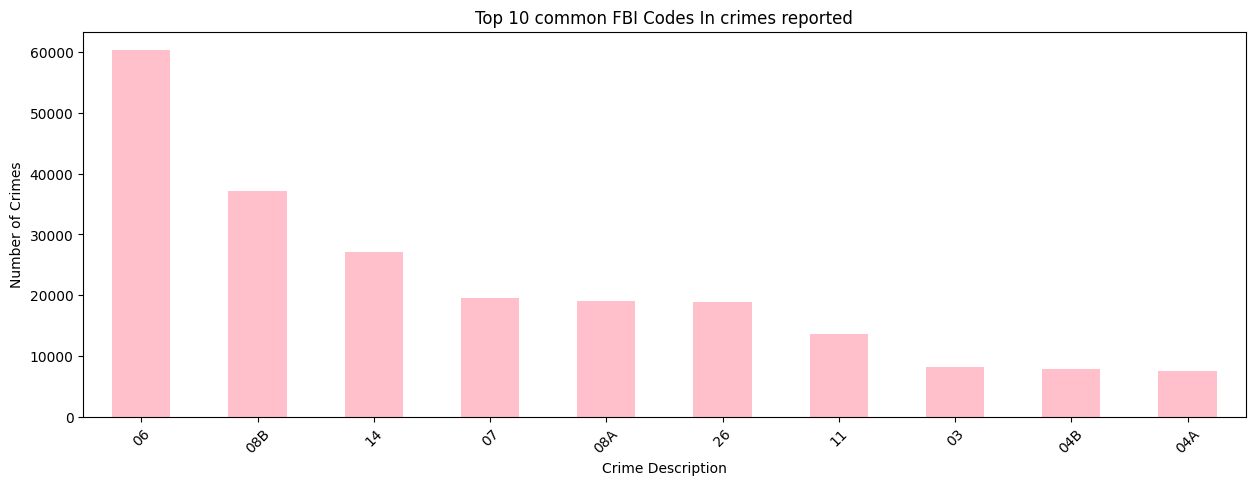

In [43]:
fbi_code = data['FBI Code'].value_counts().head(10)

fbi_code.plot(kind='bar', color='pink', figsize=(15,5))
plt.title("Top 10 common FBI Codes In crimes reported")
plt.xlabel("Crime Description")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 34:</span> The visualization shows the Top 10 Most Common FBI Crime Codes Reported, with 06 (Simple Assault) leading at 60,000+ records,  nearly double the next highest. Followed by 08B (Larceny – Theft from Building at 37,000 records) and 14 (Aggravated Assault at 27,000 records). These top codes represent the most frequently reported violent and property offenses citywide.</h4>
<hr>
<br>

<br>
<br>
<h2>ANALYSIS 35: CRIME FREQUENCY BY DAY OF THE WEEK AND BY HOUR OF THE DAY</h2>
<hr>

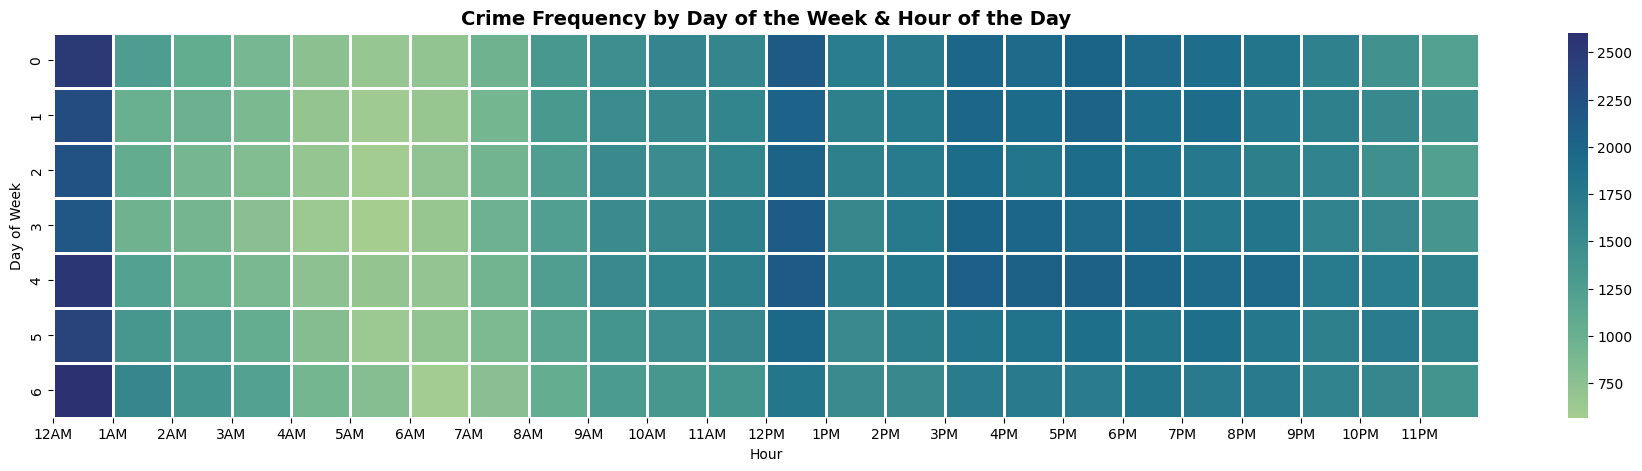

In [44]:
datas = data.groupby(['DayOfWeek','HourOfDay']).size().unstack()

plt.figure(figsize=(23,5))
sns.heatmap(datas, cmap="crest", linewidths=1)
plt.title("Crime Frequency by Day of the Week & Hour of the Day", fontsize=14, fontweight="bold")
plt.xticks(
    range(0, 24),
    ['12AM','1AM','2AM','3AM','4AM','5AM',
     '6AM','7AM','8AM','9AM','10AM','11AM','12PM',
     '1PM','2PM','3PM','4PM','5PM','6PM',
     '7PM','8PM','9PM','10PM','11PM']
)
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.show()

<br>
<h4><span style="color: blue;">INSIGHT 35:</span> This heatmap displays Crime Frequency by Day of Week & Hour of Day, with darker blue indicating higher crime up to 2,500 records and lighter green indicating lower crime 750 records. Crime consistently peaks between 4 PM and 8 PM across all days, with the most intense activity on Friday and Saturday evenings. The lowest crime occurs in early morning hours (1 AM–6 AM) across all days.</h4>
<hr>
<br>

   <h3 style="text-align: right; margin-right: 80px;">Analyst : Jay Cee I. Macaraig</h3>
   <h3 style="text-align: right; margin-right: 80px;">BSIT-3B</h3>